<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [10]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [11]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [12]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [13]:
df = pd.read_csv(file_name)

In [14]:
print (df.head())

   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          16  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
3  The qua

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


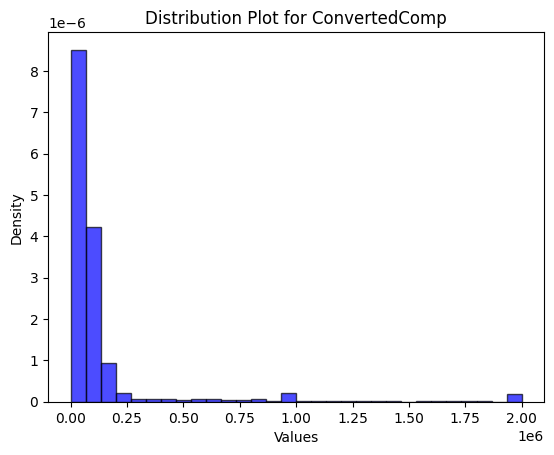

In [20]:
plt.hist(df['ConvertedComp'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution Plot for ConvertedComp')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


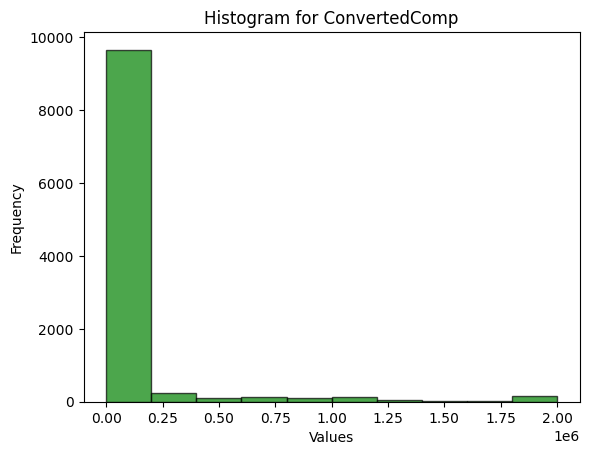

In [21]:
plt.hist(df['ConvertedComp'], bins=10, edgecolor='black', alpha=0.7, color='green')
plt.title('Histogram for ConvertedComp')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [22]:
median_value = df['ConvertedComp'].median()
print(f"Median of ColumnName: {median_value}")

Median of ColumnName: 57745.0


How many responders identified themselves only as a **Man**?


In [24]:
count_man = df['ConvertedComp'].value_counts().get('Man', 0)
print(f"Number of responders identifying as Man: {count_man}")

Number of responders identifying as Man: 0


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [29]:
filtered_df = df[df['Gender'] == 'Woman']
median_converted_comp = filtered_df['ConvertedComp'].median()
print(f"Median ConvertedComp for responders identifying as Woman: {median_converted_comp}")

Median ConvertedComp for responders identifying as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [28]:
min_value = df['Age'].min()
q1 = df['Age'].quantile(0.25)
median = df['Age'].median()
q3 = df['Age'].quantile(0.75)
max_value = df['Age'].max()

print("Five-number summary:")
print(f"Min: {min_value}, Q1: {q1}, Median: {median}, Q3: {q3}, Max: {max_value}")

Five-number summary:
Min: 16.0, Q1: 25.0, Median: 29.0, Q3: 35.0, Max: 99.0


Plot a histogram of the column `Age`.


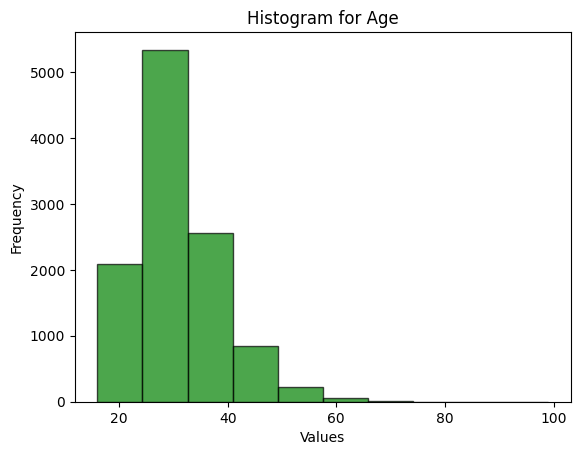

In [30]:
plt.hist(df['Age'], bins=10, edgecolor='black', alpha=0.7, color='green')
plt.title('Histogram for Age')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


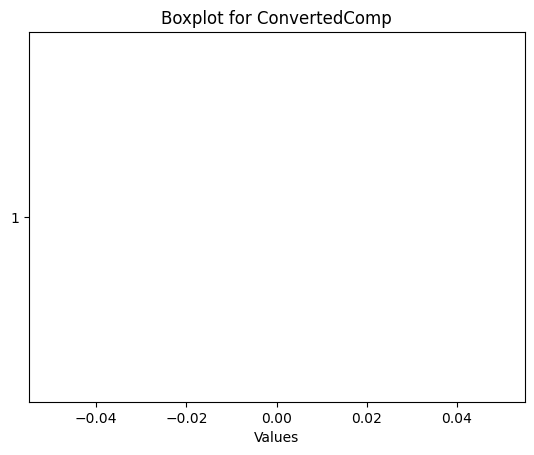

In [31]:
plt.boxplot(df['ConvertedComp'], vert=False)
plt.title('Boxplot for ConvertedComp')
plt.xlabel('Values')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [32]:
q1 = df['ConvertedComp'].quantile(0.25)  
q3 = df['ConvertedComp'].quantile(0.75)  
iqr = q3 - q1
print(f"IQR of ConvertedComp: {iqr}")

IQR of ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [34]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print (f"Lower Bound of CovertedComp: {lower_bound}")
print (f"Upper Bound of ConvertedComp: {upper_bound}")

Lower Bound of CovertedComp: -82830.0
Upper Bound of ConvertedComp: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [35]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
outlier_count = len(outliers)

print(f"Number of outliers in ConvertedComp: {outlier_count}")

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [36]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print(f"Original DataFrame size: {len(df)}")
print(f"DataFrame size after removing outliers: {len(df_no_outliers)}")

Original DataFrame size: 11398
DataFrame size after removing outliers: 9703


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [40]:
numerical_columns = df.select_dtypes(include=['number']).columns
print(f"Numerical columns: {numerical_columns.tolist()}")

Numerical columns: ['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'Age']


In [43]:

correlations = df[['Age', 'Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs']].corr()['Age'].sort_values(ascending=False)

print("Correlation of 'Age' with other numerical columns:")
print(correlations)


Correlation of 'Age' with other numerical columns:
Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
